In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import make_classification

X, y = make_classification(
    n_samples=300,
    n_features=2,
    n_redundant=0,
    n_clusters_per_class=1,
    random_state=42
)


In [22]:
class GDLogisticRegression:
    def __init__(self, learning_rate=0.1, tolerance=1e-4, max_iter=1000):
        self.learning_rate = learning_rate
        self.tolerance = tolerance
        self.max_iter = max_iter

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        n_samples, n_features = X.shape
        y = y.ravel()
        self.loss_history=[]

        self.weights = np.zeros(n_features)
        self.bias = 0.0
        self.loss_history = []

        for _ in range(self.max_iter):
            z = X @ self.weights + self.bias
            y_hat = self.sigmoid(z)
            loss = -np.mean(
            y * np.log(y_hat + 1e-15) +
                (1 - y) * np.log(1 - y_hat + 1e-15)
            )
            self.loss_history.append(loss)
            dw = (1 / n_samples) * X.T @ (y_hat - y)
            db = (1 / n_samples) * np.sum(y_hat - y)
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            if np.linalg.norm(dw) < self.tolerance:
                break

    def predict_proba(self, X):
        z = X @ self.weights + self.bias
        return self.sigmoid(z)

    def predict(self, X, threshold=0.5):
        return (self.predict_proba(X) >= threshold).astype(int)


In [23]:
GDLR= GDLogisticRegression()
GDLR.fit(X,y)
y_pred = GDLR.predict(X)

In [24]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score
from sklearn.linear_model import LogisticRegression
sk_model = LogisticRegression()
sk_model.fit(X, y)
y_pred_sk = sk_model.predict(X)

print("My model acc:", accuracy_score(y, y_pred))
print("Sklearn acc:", accuracy_score(y, y_pred_sk))
print("\nMy model recall:", recall_score(y, y_pred))
print("Sklearn recall:", recall_score(y, y_pred_sk))
print("\nMy model precision:", precision_score(y, y_pred))
print("Sklearn precision:", precision_score(y, y_pred_sk))
print("\nMy model f1:", f1_score(y, y_pred))
print("Sklearn f1:", f1_score(y, y_pred_sk))

My model acc: 0.9233333333333333
Sklearn acc: 0.93

My model recall: 0.9266666666666666
Sklearn recall: 0.9333333333333333

My model precision: 0.9205298013245033
Sklearn precision: 0.9271523178807947

My model f1: 0.9235880398671097
Sklearn f1: 0.9302325581395349


# We see our model from scratch and sklearn model have almost same metrics in classification. So our model works correct

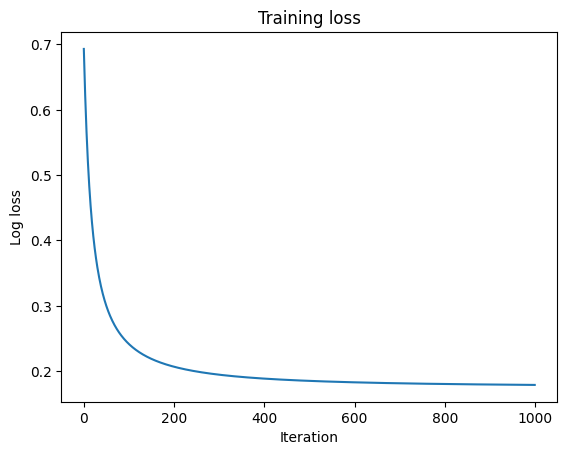

In [26]:
import matplotlib.pyplot as plt

plt.plot(GDLR.loss_history)
plt.xlabel("Iteration")
plt.ylabel("Log loss")
plt.title("Training loss")
plt.show()


# Our model converges after 200 iteration, and then there is no big change

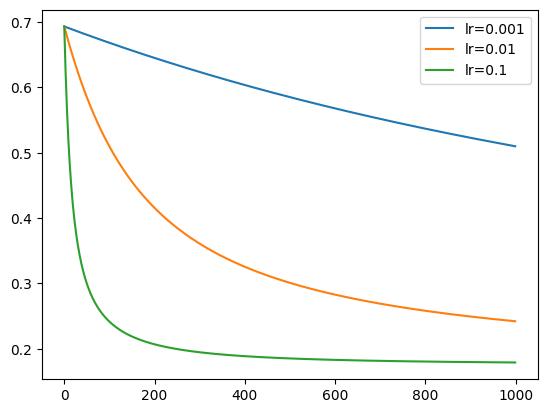

In [29]:
lrs = [0.001, 0.01, 0.1]

for lr in lrs:
    model = GDLogisticRegression(learning_rate=lr)
    model.fit(X, y)
    plt.plot(model.loss_history, label=f"lr={lr}")

plt.legend()
plt.show()


In [31]:
thresholds = [0.3, 0.5, 0.7]

for t in thresholds:
    preds = (GDLR.predict_proba(X) >= t).astype(int)
    print(t, accuracy_score(y, preds))


0.3 0.92
0.5 0.9233333333333333
0.7 0.9266666666666666


# When we change thresholds, we see our model confident in most of its decisions, changing thresholds doesnt gives improvements

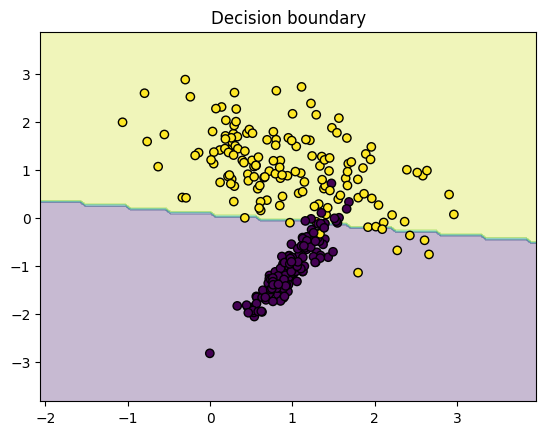

In [34]:
import numpy as np
import matplotlib.pyplot as plt

x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))
Z = GDLR.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:,0], X[:,1], c=y, edgecolor='k')
plt.title("Decision boundary")
plt.show()


# In this graph we see the line that divides all data. Its almost perfect